In [ ]:
#Importing some libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.cm import rainbow

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
np.warnings.filterwarnings('ignore')

In [ ]:
#START HERE
column_names = [
  "age", #2
  "sex", #3
  "painloc", #4
  "painexer", #5
  "relrest", #6
  "systolic resting-blood-pressure", #9
  "smoke", #12
  "famhist", #17
  "max-heart-rate-achieved", #31
  "heart-disease" #57
]

In [ ]:
#Importing the dataset
location = '/content/sample_data/dataset.csv'
dataset = pd.read_csv(location)
X = dataset.iloc[:, [2, 3, 4, 5, 6, 9, 12, 17, 31]].values
Y = dataset.iloc[:, 57].values

#Replace all 'heart-disease' values greater than 0 because my goal is not to classify the disease type
for x,i in enumerate(Y):
        if i>0:Y[x]=1

print('printing dataset info')
dataset.info()

print('Describing dataset')
dataset.describe()
print(dataset.describe())

printing dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 76 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Apart                    200 non-null    int64  
 1   from                     200 non-null    int64  
 2   age                      200 non-null    int64  
 3   gender                   200 non-null    int64  
 4   painloc                  200 non-null    int64  
 5   painexer                 200 non-null    int64  
 6   relrest                  200 non-null    int64  
 7   online                   200 non-null    int64  
 8   editor                   200 non-null    int64  
 9   resting-blood-pressure   200 non-null    int64  
 10  help                     200 non-null    int64  
 11  you                      200 non-null    int64  
 12  smoke                    200 non-null    int64  
 13  smoke years              200 non-null    int64  
 14  word

Printing Bargraph


Text(0.5, 1.0, 'Count of each Heart Disease')

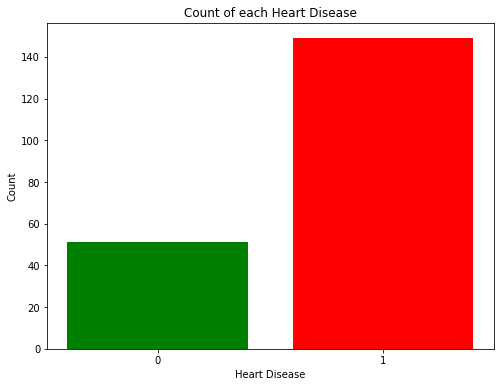

In [ ]:
#BarPlot
print("Printing Bargraph")
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['heart-disease'].unique(), dataset['heart-disease'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of each Heart Disease')

histogram


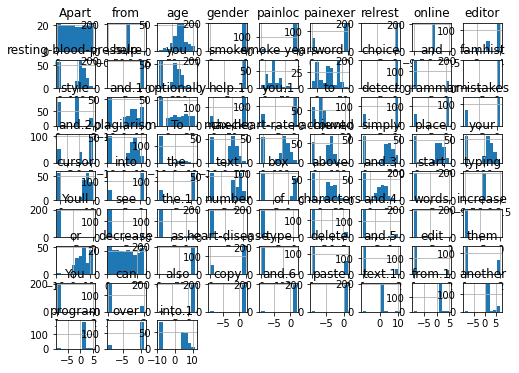

In [ ]:
histogram = dataset.hist()
print("histogram")

In [ ]:
#Taking care of missing data
#from sklearn.preprocessing import Imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=-9, strategy='mean')

# imputer = Imputer(missing_values=-9, strategy='most_frequent', axis=0)
imputer.fit(X[:, [6,7]])
X[:, [6,7]] = imputer.transform(X[:, [6,7]]) #Replace old data with new one.
imputer = SimpleImputer(missing_values=-9, strategy='mean')
imputer.fit(X[:, [5,8]])
X[:, [5,8]] = imputer.transform(X[:, [5,8]])  # Replace old data with new one.

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection._split import train_test_split
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)
X_train, X_test, Y_Train, Y_Test = train_test_split(X_resampled, y_resampled, test_size=0.25)

#Use actual data for tests and not the data created through imbalanced-learn
new = train_test_split(X, Y, test_size=0.25)
X_test = new[1]
Y_Test = new[3]

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT.fit(X_train, Y_Train)
DT_Pred = DT.predict(X_test)
DTScore = accuracy_score(Y_Test, DT_Pred)
DT_precision_score = precision_score(Y_Test,DT_Pred)
DT_recall_score = recall_score(Y_Test,DT_Pred)
DT_Score = f1_score(Y_Test,DT_Pred)
print("precision score = ",DT_precision_score)
print("recall score = ", DT_recall_score)
print("f1 score = ", DTScore)
print("accuracy score of Decision Tree Algorithm = " ,DT_Score)

precision score =  0.8387096774193549
recall score =  0.7222222222222222
f1 score =  0.7
accuracy score of Decision Tree Algorithm =  0.7761194029850746


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
   
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_Train)
KNN_pred = KNN.predict(X_test)
KNNScore = accuracy_score(Y_Test,KNN_pred)
KNN_precision_score = precision_score(Y_Test,KNN_pred)
KNN_recall_score = recall_score(Y_Test,KNN_pred)
KNN_Score = f1_score(Y_Test,KNN_pred)
print("precision score = ",KNN_precision_score)
print("recall score = ", KNN_recall_score)
print("f1 score = ", KNNScore)
print("accuracy score of KNNeighbors Algorithm = " ,KNN_Score)

precision score =  0.8823529411764706
recall score =  0.8333333333333334
f1 score =  0.8
accuracy score of KNNeighbors Algorithm =  0.8571428571428571


In [ ]:
#SVM Algorithm
from sklearn.svm import SVC
  
SVC = SVC()
SVC.fit(X_train,Y_Train)
SVC_pred = SVC.predict(X_test)
SVCScore = accuracy_score(Y_Test,SVC_pred)
SVC_precision_score = precision_score(Y_Test,SVC_pred)
SVC_recall_score = recall_score(Y_Test,SVC_pred)
SVC_Score = f1_score(Y_Test,SVC_pred)
print("precision score = ",SVC_precision_score)
print("recall score = ", SVC_recall_score)
print("f1 score = ", SVCScore)
print("accuracy score of SVM Algorithm = " ,SVC_Score)

precision score =  0.84375
recall score =  0.75
f1 score =  0.72
accuracy score of SVM Algorithm =  0.7941176470588235


In [ ]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
    
NB = GaussianNB()
NB.fit(X_train,Y_Train)
NB_pred = NB.predict(X_test)
NBScore = accuracy_score(Y_Test,NB_pred)
NB_precision_score = precision_score(Y_Test,NB_pred)
NB_recall_score = recall_score(Y_Test,NB_pred)
NB_Score = f1_score(Y_Test,NB_pred)
print("precision score = ",NB_precision_score)
print("recall score = ", NB_recall_score)
print("f1 score = ", NBScore)
print("accuracy score of  Naive Bayes Algorithm = " ,NB_Score)

precision score =  0.8857142857142857
recall score =  0.8611111111111112
f1 score =  0.82
accuracy score of  Naive Bayes Algorithm =  0.8732394366197184


In [ ]:
from sklearn.ensemble import RandomForestClassifier
    
RDF = RandomForestClassifier()
RDF.fit(X_train,Y_Train)
   
RDF_pred = RDF.predict(X_test)
RDFScore = accuracy_score(Y_Test,RDF_pred)
RDF_precision_score = precision_score(Y_Test,RDF_pred)
RDF_recall_score = recall_score(Y_Test,RDF_pred)
RDF_Score = f1_score(Y_Test,RDF_pred)
print("precision score = ",RDF_precision_score)
print("recall score = ", RDF_recall_score)
print("f1 score = ", RDFScore)
print("accuracy score of Random Forest Algorithm = " ,RDF_Score)

precision score =  0.8421052631578947
recall score =  0.8888888888888888
f1 score =  0.8
accuracy score of Random Forest Algorithm =  0.8648648648648649


In [ ]:
import sklearn.pipeline
from sklearn.decomposition import KernelPCA
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix
    
kernel = KernelPCA()
pipeline: Pipeline = make_pipeline(kernel, RDF)
pipeline.fit(X_train, Y_Train)

Pipeline(steps=[('kernelpca', KernelPCA()),
                ('randomforestclassifier', RandomForestClassifier())])